In [49]:
from collections import defaultdict
import numpy as np
import math
import matplotlib.pyplot as plt
rnd=np.random
rnd.seed(5)

class node:
    def __init__(self, x, y,Type):
        self.x = x
        self.y = y
        self.type=Type

class edge:
    def __init__(self, start, end):
        self.start = start
        self.end = end
        self.cost = ((start.x-end.x)**2+(start.y-end.y)**2)**(1/2)

class sol:
    def __init__(self, nodes, edges, total_cost):
        self.nodes = nodes      #array of nodes in solution
        self.edges = edges      #array of edges in solution
        self.total_cost = total_cost



In [50]:
##Type 1 = Hospitals
##type 2 = Green patients
##Type 3 = Red Patients

s0=[(0,3), (3, 9),(9, 0), (0, 2), (2, 5), (5, 7), (7, 0), (0, 6), (6, 4), (4, 8), (8, 1)]
#initial solution

n_g=6#these are the characteristics of the initial solution
n_r=2
n_h=2
n_k=3
n_p=n_g+n_r
total_nodes=n_g+n_r+n_h

G=[]# creating a graph to "fit" that initial solution

for i in range(total_nodes):
    if i<n_h:
        G.append(node(rnd.randint(20),rnd.randint(20),1))
    elif i>=n_h and i<n_h+n_g:
        G.append(node(rnd.randint(20),rnd.randint(20),2))
    else:
        G.append(node(rnd.randint(20),rnd.randint(20),3))

A=[(i,j) for i in range(total_nodes) for j in range(total_nodes) if i!=j] #set of arcs

E=[edge(G[i],G[j]) for i,j in A] #all edges

def cost_solution(solution): #given a set of arcs, it will give you the total cost (distance) which is NOT yet the time
    total_=0
    for i,j in solution:
        total_=total_+edge(G[i],G[j]).cost
    print(total_)

In [51]:
def sol_from_paths(paths): 
    #it will divide each solution in their respective paths. A path or route is when an ambulance leaves and comes back to any hospital
    sol=[]
    for j in paths:
        for i in range(len(paths[j])-1):
            sol.append((paths[j][i],paths[j][i+1]))
    return sol

def extract_paths(solution): #SOLVE the empty dictionary
    sol=solution
    paths={i:[] for i in range(n_k)}
    while len(sol)>0:
        for j in range(n_k):
            for i in sol: 
                if G[i[0]].type==1 and len(paths[j])==0:
                    paths[j].append(i[0])
                    paths[j].append(i[1])
                    sol.remove(i)
                if len(paths[j])>0:
                    if i[0]==paths[j][-1]:
                        paths[j].append(i[1])
                        sol.remove(i)
                        if G[i[1]].type==1:
                            break
    sol=sol_from_paths(paths)
    return sol,paths

In [53]:
#test of the path function
s0=[(0,3), (3, 9),(9, 0), (0, 2), (2, 5), (5, 7), (7, 0), (0, 6), (6, 4), (4, 8), (8, 1)]
print(extract_paths(s0)[0])
s0=[(0,3), (3, 9),(9, 0), (0, 2), (2, 5), (5, 7), (7, 0), (0, 6), (6, 4), (4, 8), (8, 1)]
print(extract_paths(s0)[1])

[(0, 3), (3, 9), (9, 0), (0, 2), (2, 5), (5, 7), (7, 0), (0, 6), (6, 4), (4, 8), (8, 1)]
{0: [0, 3, 9, 0], 1: [0, 2, 5, 7, 0], 2: [0, 6, 4, 8, 1]}


In [54]:
def swapPositions(list, pos1, pos2): 
    list[pos1], list[pos2] = list[pos2], list[pos1] 
    return list

def internal_patients_swap(paths): #swaps two green patients within the same route (path).
    paths=paths
    pos1=2295
    pos2=2295
    cnt=1
    while cnt>0:
        greens=[]
        i=rnd.randint(len(paths.keys()))
        for j in range(len(paths[i])):
            if G[paths[i][j]].type==2:
                greens.append(j) #index of green patients
        if len(greens)>1:
            while pos1==pos2:
                pos1=greens[rnd.randint(len(greens))]
                pos2=greens[rnd.randint(len(greens))]
            paths[i]=swapPositions(paths[i],pos1,pos2) #swaps two green patients in a path, guarantee to still be feasible
            sol=sol_from_paths(paths)
            return sol,paths

In [60]:
s0=[(0,3), (3, 9),(9, 0), (0, 2), (2, 5), (5, 7), (7, 0), (0, 6), (6, 4), (4, 8), (8, 1)]
cost_solution(s0)
new_sol=internal_patients_swap(extract_paths(s0)[1])
cost_solution(new_sol[0])
print(new_sol[1])

92.8898607669593
83.45775378202536
{0: [0, 3, 9, 0], 1: [0, 2, 5, 7, 0], 2: [0, 4, 6, 8, 1]}


In [61]:
def internal_patients_relocate(paths): #changes the position of a green patient within one route (path). it is not allowed to be inserted after a red patient
    paths=paths
    pos1=2295
    pos2=2295
    cnt=1
    while cnt>0:
        greens=[]
        i=rnd.randint(len(paths.keys()))
        for j in range(len(paths[i])):
            if G[paths[i][j]].type==2:
                greens.append(j) #index of green patients
        if len(greens)>1:
            while pos1==pos2: 
                pos1=greens[rnd.randint(len(greens))] #index: relocate from
                pos2=greens[rnd.randint(len(greens))] #index: relocate to
            paths[i].insert(pos2,paths[i].pop(pos1)) #relocates the green patient from pos1 to pos2, it guarantees feasibility because we never try swapping with red code
            sol=sol_from_paths(paths)
            return sol,paths

In [62]:
s0=[(0,3), (3, 9),(9, 0), (0, 2), (2, 5), (5, 7), (7, 0), (0, 6), (6, 4), (4, 8), (8, 1)]
cost_solution(s0)
new_sol=internal_patients_relocate(extract_paths(s0)[1])
cost_solution(new_sol[0])
print(new_sol[1])


92.8898607669593
83.45775378202536
{0: [0, 3, 9, 0], 1: [0, 2, 5, 7, 0], 2: [0, 4, 6, 8, 1]}


In [63]:
def single_hospital_change(paths): 
    #changes the destination hospital to an alternative hospital. We need to check feasibility for this one because of the capacity of hospitals
    paths=paths
    hosp=[]
    i=rnd.randint(len(paths.keys()))
    for j in range(len(G)):
        if G[j].type==1:
            hosp.append(j)
    current=paths[i][-1]
    new=hosp[rnd.randint(len(hosp))]
    while current==new:
        new=hosp[rnd.randint(len(hosp))]
    paths[i][-1]=new
    sol=sol_from_paths(paths)
    return sol,paths



In [71]:
s0=[(0,3), (3, 9),(9, 0), (0, 2), (2, 5), (5, 7), (7, 0), (0, 6), (6, 4), (4, 8), (8, 1)]
cost_solution(s0)
new_sol=single_hospital_change(extract_paths(s0)[1])
cost_solution(new_sol[0])
print(new_sol[1])

92.8898607669593
79.47345290196057
{0: [0, 3, 9, 0], 1: [0, 2, 5, 7, 1], 2: [0, 6, 4, 8, 1]}


In [67]:
s0=[(0,3), (3, 9),(9, 0), (0, 2), (2, 5), (5, 7), (7, 0), (0, 6), (6, 4), (4, 8), (8, 1)]
def plotting(G,s0):
    for i in G:
        if i.type==1:
            plt.scatter(i.x,i.y,c='y')
        elif i.type==2:
             plt.scatter(i.x,i.y,c='g')
        else:
             plt.scatter(i.x,i.y,c='r')

    for i,j in s0:
        plt.plot([G[i].x, G[j].x], [G[i].y,G[j].y],c='b', alpha=0.5)
    for i in range(len(G)):
        plt.annotate((i),(G[i].x+0.1,G[i].y+0.1))
    plt.axis('equal')

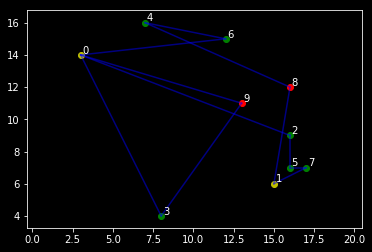

In [72]:
#test plotting
plotting(G,new_sol[0])

In [89]:
### external disturbances
def external_patients_relocate(paths): #chages one patient from route i to route k
    paths=paths
    pos1=2295
    pos2=2295
    greens_i=[] #stores indexes of green patients in path i
    greens_k=[] #stores indexes of green patients in path k
    i=1; k=1
    cnt=1
    while cnt>0:
        while i==k: #pick two different random paths
            i=rnd.randint(len(paths.keys()))
            k=rnd.randint(len(paths.keys()))
        for j in range(len(paths[i])):
            if G[paths[i][j]].type==2:
                greens_i.append(j) #index of green patients in path i
        for j in range(len(paths[k])):
            if G[paths[k][j]].type==2:
                greens_k.append(j) #index of green patients in path k
            if len(greens_i)==0 or len(greens_k)==0:
                continue    
        pos1=greens_i[rnd.randint(len(greens_i))] #index: relocate from
        pos2=greens_k[rnd.randint(len(greens_k))] #index: relocate to
        paths[i].insert(pos1,paths[k].pop(pos2)) 
        sol=sol_from_paths(paths)
        return sol,paths

In [93]:
s0=[(0,3), (3, 9),(9, 0), (0, 2), (2, 5), (5, 7), (7, 0), (0, 6), (6, 4), (4, 8), (8, 1)]
p=extract_paths(s0)
print(p[1])
print(external_patients_relocate(p[1])[1])

{0: [0, 3, 9, 0], 1: [0, 2, 5, 7, 0], 2: [0, 6, 4, 8, 1]}
{0: [0, 6, 3, 9, 0], 1: [0, 2, 5, 7, 0], 2: [0, 4, 8, 1]}


In [114]:
def external_path_swap(paths): #picks a green patient in path i and k, and anything after those patients get swapped
    paths=paths
    pos1=0
    pos2=0
    greens_i=[] #stores indexes of green patients in path i
    greens_k=[] #stores indexes of green patients in path k
    i=1; k=1
    cnt=1
    while cnt>0:
        while i==k: #pick two different random paths
            i=rnd.randint(len(paths.keys()))
            k=rnd.randint(len(paths.keys()))
        for j in range(len(paths[i])):
            if G[paths[i][j]].type==2:
                greens_i.append(j) #index of green patients in path i
        for j in range(len(paths[k])):
            if G[paths[k][j]].type==2:
                greens_k.append(j) #index of green patients in path k
        if len(greens_i)==0 or len(greens_k)==0:
            break  
        pos1=greens_i[rnd.randint(len(greens_i))] #index of path i
        pos2=greens_k[rnd.randint(len(greens_k))] #index of path k

        #switch everything going after each patient in their respective paths
        temp_i_first_half=[]
        temp_i_second_half=[]
        temp_k_first_half=[]
        temp_k_second_half=[]
        for l in range(len(paths[i])):
            if l<pos1: 
                temp_i_first_half.append(paths[i][l])
            else: 
                temp_i_second_half.append(paths[i][l])
        for l in range(len(paths[k])):
            if l<pos2: 
                temp_k_first_half.append(paths[k][l])
            else: 
                temp_k_second_half.append(paths[k][l])
        paths[i]=temp_i_first_half+temp_k_second_half
        paths[k]=temp_k_first_half+temp_i_second_half
        sol=sol_from_paths(paths)
        return sol,paths

In [117]:
s0=[(0,3), (3, 9),(9, 0), (0, 2), (2, 5), (5, 7), (7, 0), (0, 6), (6, 4), (4, 8), (8, 1)]
p=extract_paths(s0)
print(p[1])
print(external_path_swap(p[1])[1])

{0: [0, 3, 9, 0], 1: [0, 2, 5, 7, 0], 2: [0, 6, 4, 8, 1]}
{0: [0, 7, 0], 1: [0, 2, 5, 3, 9, 0], 2: [0, 6, 4, 8, 1]}


In [121]:
def Hospital_swapPositions(list1,list2, pos1, pos2): 
    list1[pos1], list2[pos2] = list2[pos2], list1[pos1] 
    return list1,list2

def external_hospital_swap(paths): 
    #swaps the destination hospital of two routes. We need to check feasibility for this one because of the capacity of hospitals
    paths=paths
    pos1=0
    pos2=0
    i=1; k=1
    cnt=1
    while i==k: #pick two different random paths
        i=rnd.randint(len(paths.keys()))
        k=rnd.randint(len(paths.keys()))
    paths[i][len(paths[i])-1],paths[k][len(paths[k])-1] = paths[k][len(paths[k])-1], paths[i][len(paths[i])-1]
    sol=sol_from_paths(paths)
    return sol,paths



In [124]:
s0=[(0,3), (3, 9),(9, 0), (0, 2), (2, 5), (5, 7), (7, 0), (0, 6), (6, 4), (4, 8), (8, 1)]
p=extract_paths(s0)
print(p[1])
print(external_hospital_swap(p[1])[1])

{0: [0, 3, 9, 0], 1: [0, 2, 5, 7, 0], 2: [0, 6, 4, 8, 1]}
{0: [0, 3, 9, 0], 1: [0, 2, 5, 7, 1], 2: [0, 6, 4, 8, 0]}
